In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile

local_zip = '/content/gdrive/MyDrive/Marvel.v1i.multiclass.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/train/_classes.csv')

columns=[" cargo", " carrier", " cruise", " ship"]

datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [ ]:
df.shape

(900, 5)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=df[:720],
directory='/content/train',
x_col="filename",
y_col= columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(100,100))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[720:810],
directory='/content/train',
x_col='filename',
y_col= columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(100,100))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df[810:],
directory='/content/train',
x_col='filename',
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,100))

Found 720 validated image filenames.
Found 90 validated image filenames.
Found 90 validated image filenames.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
22/22 [==============================] - 36s 138ms/step - loss: 0.6311 - accuracy: 0.3113 - val_loss: 0.6238 - val_accuracy: 0.5625
Epoch 2/10
22/22 [==============================] - 2s 108ms/step - loss: 0.5883 - accuracy: 0.4236 - val_loss: 0.6365 - val_accuracy: 0.3906
Epoch 3/10
22/22 [==============================] - 2s 110ms/step - loss: 0.5677 - accuracy: 0.4908 - val_loss: 0.5984 - val_accuracy: 0.4844
Epoch 4/10
22/22 [==============================] - 3s 113ms/step - loss: 0.5478 - accuracy: 0.5173 - val_loss: 0.5818 - val_accuracy: 0.5781
Epoch 5/10
22/22 [==============================] - 2s 112ms/step - loss: 0.5271 - accuracy: 0.5637 - val_loss: 0.5332 - val_accuracy: 0.5625
Epoch 6/10
22/22 [==============================] - 2s 111ms/step - loss: 0.4815 - accuracy: 0.6568 - val_loss: 0.5049 - val_accuracy: 0.7500
Epoch 7/10
22/22 [==============================] - 2s 112ms/step - loss: 0.4715 - accuracy: 0.6551 - val_loss: 0.5049 - val_accuracy: 0.6875
Epoch

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


90/90 [==============================] - 1s 4ms/step


In [ ]:
pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
columns=[" cargo", " carrier", " cruise", " ship"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)

In [ ]:
test_generator

In [ ]:
an = df[810:].drop('filename',axis=1)

In [ ]:
pa = an.to_numpy()

In [ ]:
pa.shape

(90, 4)

In [ ]:
pred

array([[0.6507455 , 0.19105388, 0.38333258, 0.22366224],
       [0.8037897 , 0.14612536, 0.21144453, 0.1275342 ],
       [0.1283659 , 0.04247718, 0.8758275 , 0.31334022],
       [0.45975462, 0.62705064, 0.1112    , 0.16900982],
       [0.6424793 , 0.42664558, 0.11535612, 0.11896646],
       [0.12586176, 0.4999988 , 0.55847126, 0.31769806],
       [0.26473272, 0.76482785, 0.10240874, 0.10732774],
       [0.8173628 , 0.2012457 , 0.14527856, 0.1495102 ],
       [0.85600126, 0.20027366, 0.07686587, 0.12218585],
       [0.18719473, 0.18393576, 0.7319013 , 0.32552   ],
       [0.2033428 , 0.28941426, 0.66880584, 0.30749843],
       [0.11452372, 0.16193493, 0.8141954 , 0.4154517 ],
       [0.5010663 , 0.50708514, 0.12428599, 0.13457708],
       [0.81023043, 0.1168766 , 0.2331645 , 0.17894219],
       [0.7393939 , 0.35916606, 0.10911518, 0.11714226],
       [0.24839479, 0.18211557, 0.67435694, 0.26114088],
       [0.46411103, 0.51712364, 0.15027416, 0.17311479],
       [0.21922812, 0.55526525,

[[24  5  3  0]
 [ 2 19  5  0]
 [ 5  5 22  0]
 [ 0  0  0  0]]


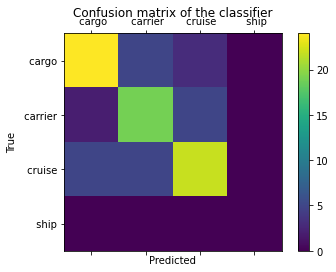

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

labels = [' cargo', ' carrier', ' cruise', ' ship']
cm = confusion_matrix(np.argmax(pa, axis=1), np.argmax(pred, axis=1), [0,1,2,3])
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

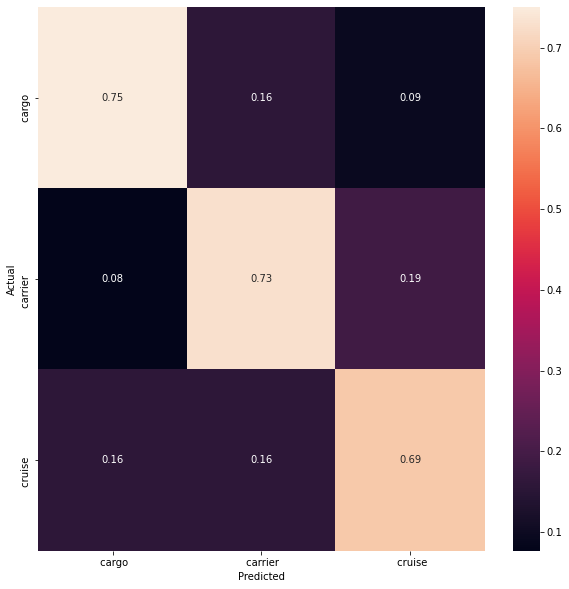

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(np.argmax(pa, axis=1), np.argmax(pred, axis=1), [0,1,2])
# Normalise
cmn = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=[' cargo', ' carrier', ' cruise'], yticklabels=[' cargo', ' carrier', ' cruise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)